# Final exam on image processing
The different materials (lessons, practicals) about image processing are authorized

DSAI 2020-2021 - S. Ainouz

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd
import itertools
from scipy.ndimage.interpolation import shift

path_base =  '..//Base_images//'

# and put/romove all what you judge necessary here


#/Users/samia/Desktop/TP_TIM_Python/Base dimages-20190909/bar.png

# Part 1 : Restauration of an old Photo

The objective of this first part is to recover the clarity and if possible details of the old photo bar.png. This photo, presents a lack in a contrast. For that, we will use some images processing tools, namely histograms enhancement to overcome this issue. We can either "clean" the image by some filtering tools to remove the few spread dark spots. 

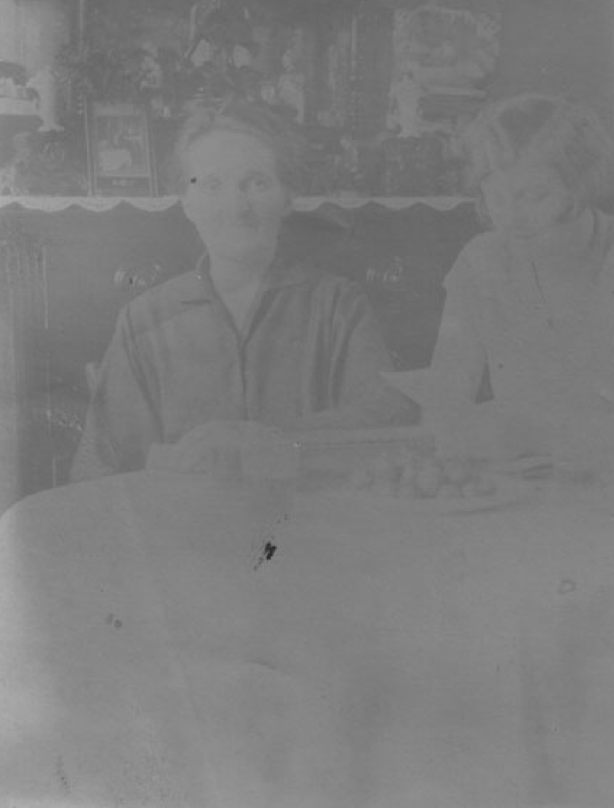


1. What is the default of this image
2. Propose the right tool to recover it and explain your choise
3. Analyse the result
4. Depending on the result, is the proposed tool adapted to the purpose.
5. Optional : clean this image and remove the dark areas by some filtering tools (ex. Median filter)

# What is the default of this image : Answer --> This image have low contrast

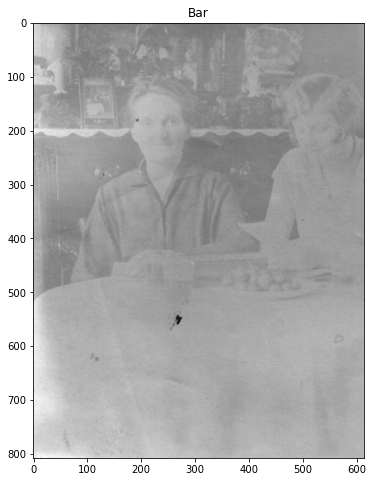

In [7]:
img = cv2.imread('bar.png',0)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(img,'gray')
plt.title('Bar')
plt.show()

# Histogram Analysis

## As we can see from this histogram the pixels of the image is concentrated to narrow range

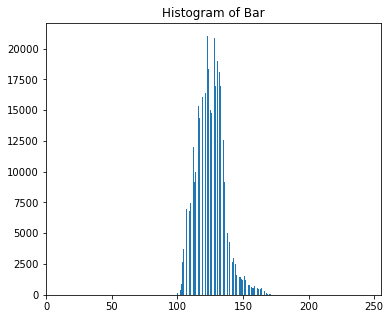

In [8]:
plt.subplots(1,1,figsize=(6,5))
plt.subplot(111)
plt.hist(img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of Bar")
plt.show()

In [11]:
(np.min(img),np.max(img))
# We see that the range is [40,175] we will try to enhance it 

(40, 175)

# Histogram Equalization

## I will try 'histogram equalization' technique in that part. Because we image histogram distribution looks an 'gaussian'didtribution and we will try to make 'uniform(close to it not exactly)' distribution with this technique

In [13]:
def histeq_(img,L = 256):
    new_img = np.zeros(shape = img.shape)
    (M,N) = img.shape
    dic = {}
    dic['Cumilative_Probability'] = []
    cumilative_prob = 0
    
    for item in range(L):
        value = np.count_nonzero(img == item) 
        cumilative_prob += (value/(M*N))
        dic['Cumilative_Probability'].append(cumilative_prob)
    
    cumilative = pd.DataFrame(dic)
   
    
        
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):

            new_img[row,column] = round((L-1) * cumilative['Cumilative_Probability'][img[row,column]]) 
           
    return new_img

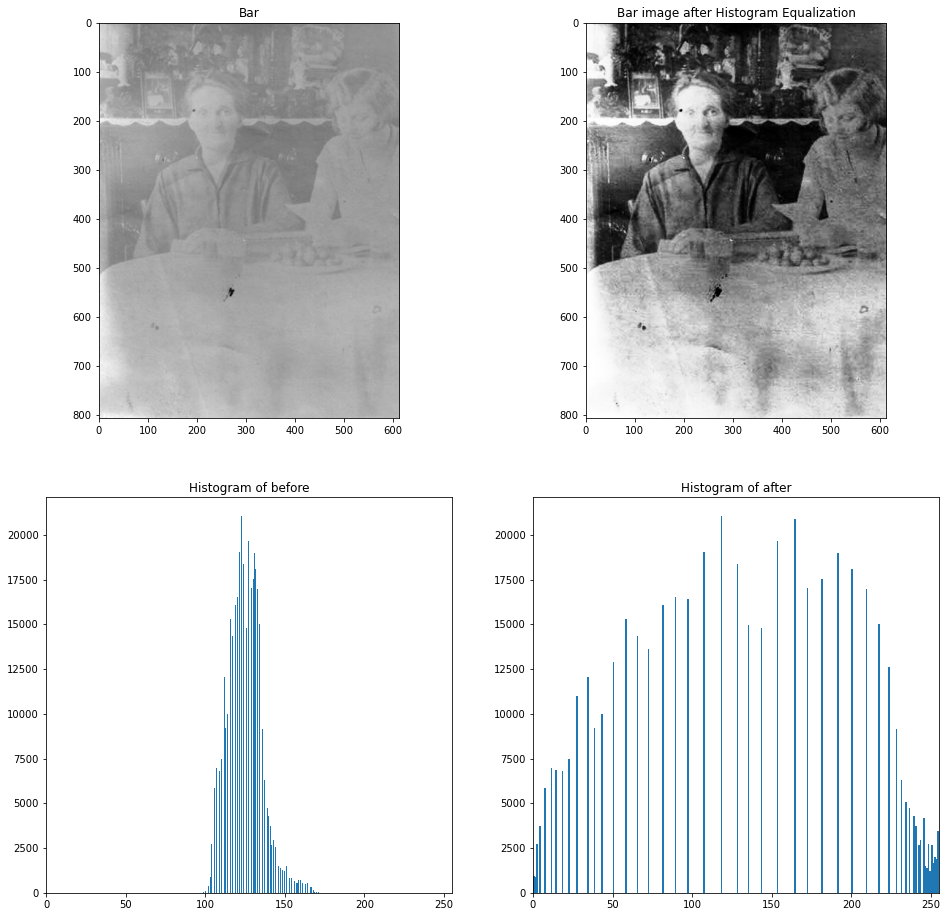

In [24]:
histeq_bar = histeq_(img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(img,'gray')
plt.title('Bar')

plt.subplot(2,2,2)
plt.imshow(histeq_bar,'gray')
plt.title('Bar image after Histogram Equalization')

plt.subplot(2,2,3)
plt.hist(img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(histeq_bar.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

# Trying median filter for to this image

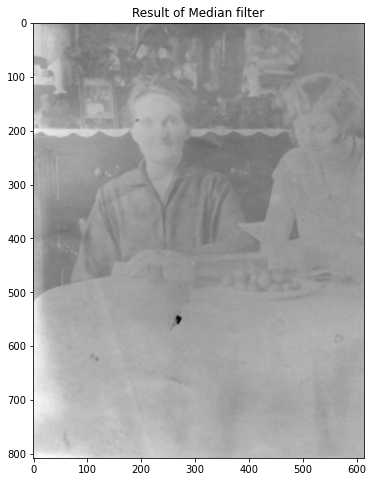

In [28]:
def median_finder(listt):
    listt.sort()
    length = len(listt)
    
    if(length%2 == 1):
        return int(listt[int((length - 1)/2)])
    
    return (int(listt[int(length/2)]) + int(listt[int(length/2)-1]))/2
def median_filter(img,m = 3,n = 3):
    
    
    if(m%2 == 0 or n%2 == 0): 
        raise Exception("m and n can't be a even number")
        
    a = int((m-1) / 2)
    b = int((n-1) / 2)
        

    filtered_image = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            kernel_list = []
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try:
                        kernel_list.append(img[row+kernel_row,column+kernel_column])
                    except:
                        continue
            
                     
       
            filtered_image[row,column] = int(round(median_finder(kernel_list)))
    
          
    return filtered_image.astype(np.uint8)

filtered_img = median_filter(img,5,5)    
plt.subplots(1,1,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(filtered_img,'gray')
plt.title('Result of Median filter')
plt.show()   

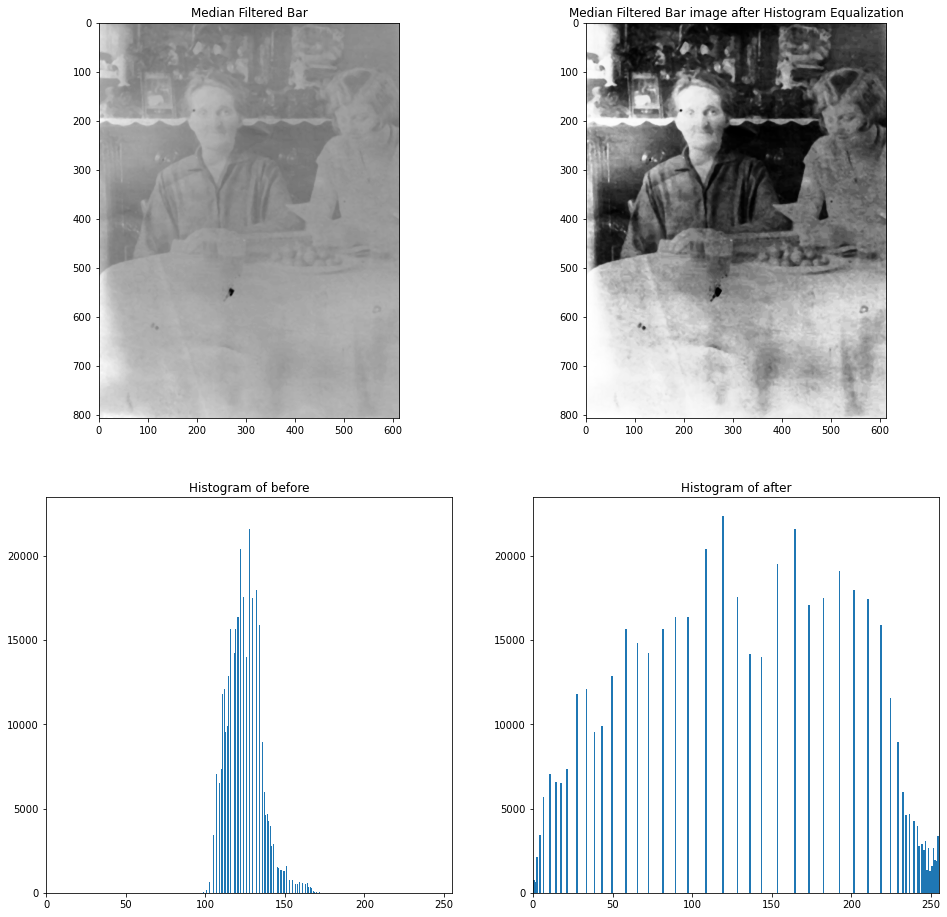

In [98]:
histeq_bar = histeq_(filtered_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(filtered_img,'gray')
plt.title('Median Filtered Bar')

plt.subplot(2,2,2)
plt.imshow(histeq_bar,'gray')
plt.title('Median Filtered Bar image after Histogram Equalization')

plt.subplot(2,2,3)
plt.hist(filtered_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(histeq_bar.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

# Cheking with mean filter

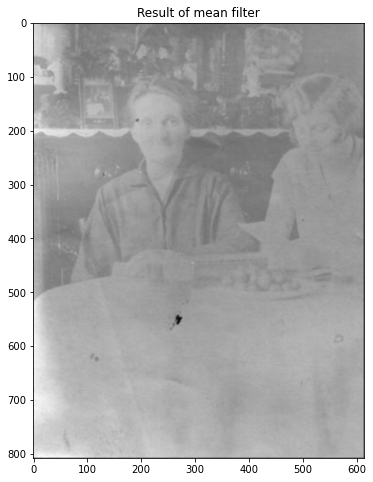

In [101]:
def mean_filter(img,m = 3,n = 3):
    
    
    if(m%2 == 0 or n%2 == 0): 
        raise Exception("m and n can't be a even number")
        
    a = int((m-1) / 2)
    b = int((n-1) / 2)

    filtered_image = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_pixel = 0
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        new_pixel += img[row+kernel_row,column+kernel_column]
                        
                    except :
                        new_pixel += 0
                    
            filtered_image[row,column] = int(round(new_pixel / (m*n)))
        
            
           
    return filtered_image.astype(np.uint8)
    
    
     
    
filtered_img_mean = mean_filter(img)    
plt.subplots(1,1,figsize=(8,8))
plt.imshow(filtered_img_mean,'gray')
plt.title('Result of mean filter')
plt.show()   


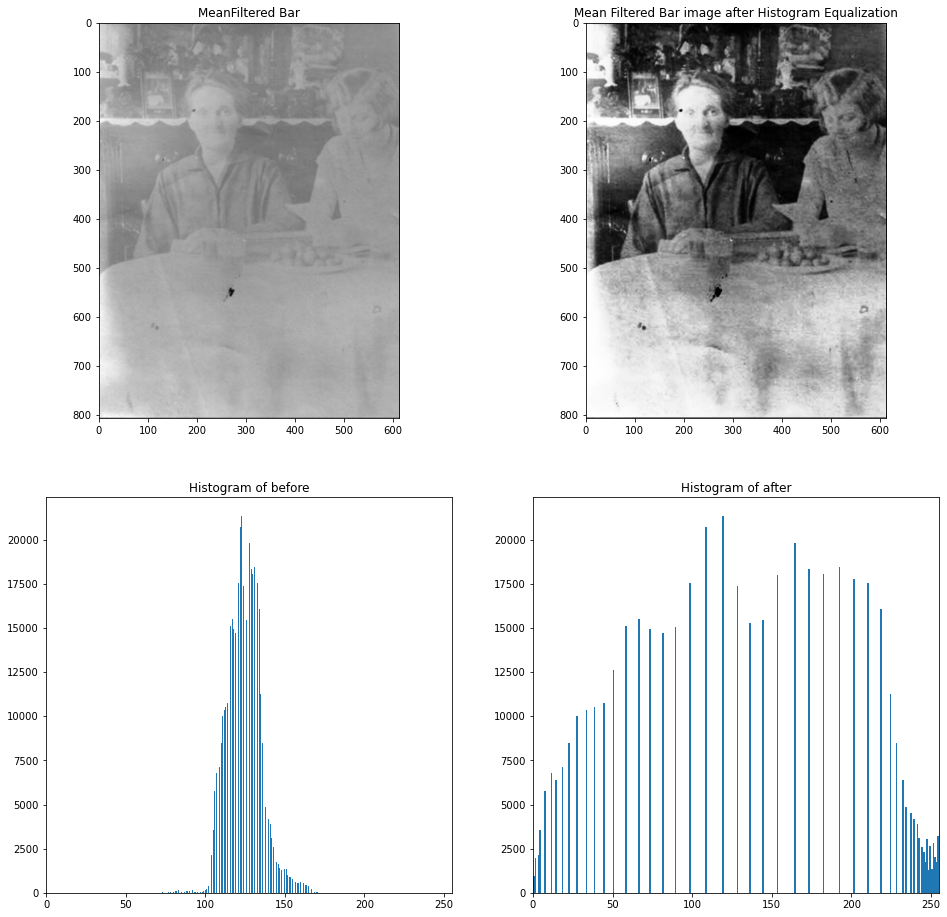

In [103]:
histeq_bar_mean = histeq_(filtered_img_mean)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(filtered_img_mean,'gray')
plt.title('MeanFiltered Bar')

plt.subplot(2,2,2)
plt.imshow(histeq_bar_mean,'gray')
plt.title('Mean Filtered Bar image after Histogram Equalization')

plt.subplot(2,2,3)
plt.hist(filtered_img_mean.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(histeq_bar_mean.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

# As we can see above two histogram plots that : In second histogram we enlarge the range and it looks more 'uniform' than another

# Part 2 : Multidimentional image processing

The objective of this first part is to detect important features in our image over different color spaces, dependent or independent color spaces. The output results should be analyzed and compared to get a conclusion about the different color spaces 


1. Download the image Aral_sea.jpg
2. Represent this image in HSV color space 
3. Display the RGB and HSV images in the same subplot
4. Perform canny edge detection on each channel for each color space. Display the results.
5. Discuss the result with regards to each channel in each color space
6. Merge the result for each color space by a max fusion (ex : output_Edge=max(edges in R, edges in G, edges in B))
7. Discuss the obtained result for each case. copare the result between them as well as with the edge detection on the gray scale image.
8. Application : With the Principal component analysis (PCA), our sattelite image is transformed to 2 principal independant channels Aral_pca_axe1, Aral_pca_axe2. These channels are sufficient to summarize the most important information of our image. With the same process as for the other color spaces, perform the Edge detection in this new color space. Discuss and justify this new result with those obtained in question 6.


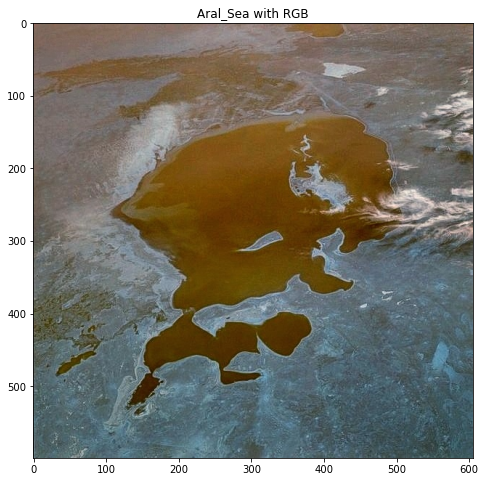

In [63]:
aralsea_img_rgb = cv2.imread('Aral_sea.jpg')
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(aralsea_img_rgb)
plt.title('Aral_Sea with RGB')
plt.show()

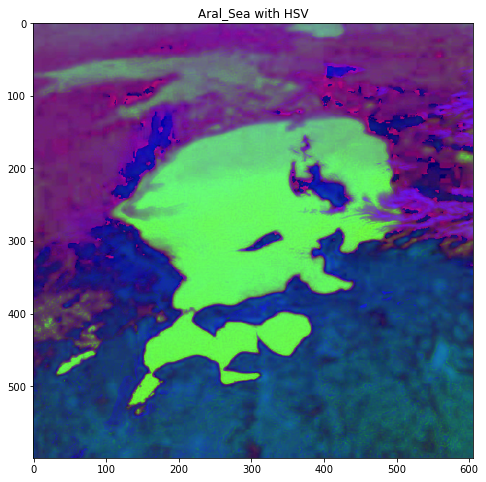

In [44]:
aralsea_img_hsv = cv2.cvtColor(aralsea_img, cv2.COLOR_BGR2HSV) 
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(aralsea_img_hsv)
plt.title('Aral_Sea with HSV')
plt.show()

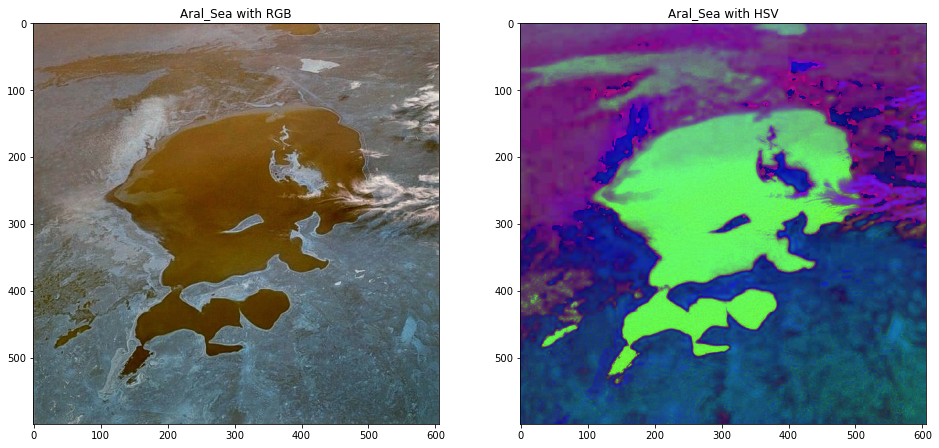

In [45]:
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(aralsea_img_rgb)
plt.title('Aral_Sea with RGB')
plt.subplot(1,2,2)
plt.imshow(aralsea_img_hsv,'gray')
plt.title('Aral_Sea with HSV');

# Let's start with RGB color space

In [46]:
(x,y,z) = aralsea_img_rgb.shape # Taking the shape of the RGB image as we know it has 3 chanel

In [48]:
# Taking the each chanel individually
R = aralsea_img_rgb[:,:,0].reshape(x,y)
G = aralsea_img_rgb[:,:,1].reshape(x,y)
B = aralsea_img_rgb[:,:,2].reshape(x,y)

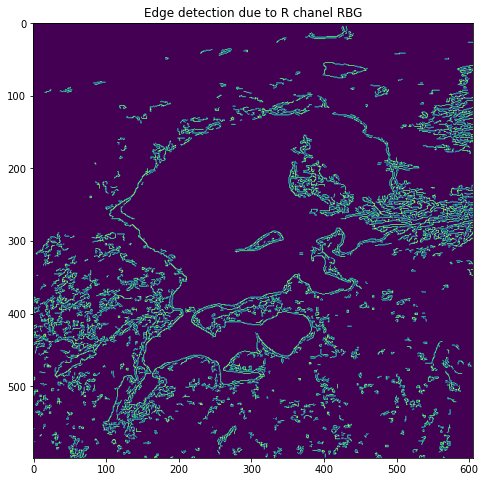

In [55]:
R_img = cv2.Canny(R,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(R_img)
plt.title('Edge detection due to R chanel RBG')
plt.show()

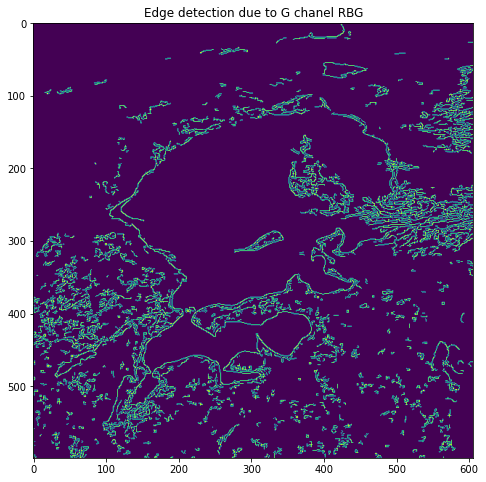

In [56]:
G_img = cv2.Canny(G,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(G_img)
plt.title('Edge detection due to G chanel RBG')
plt.show()

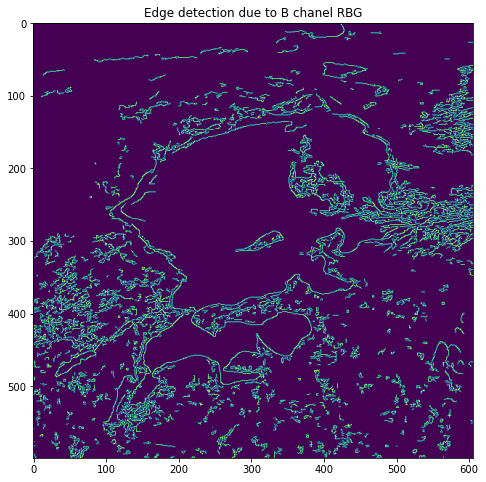

In [57]:
B_img = cv2.Canny(B,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(B_img)
plt.title('Edge detection due to B chanel RBG')
plt.show()

# For HSV color space

In [58]:
(x,y,z) = aralsea_img_hsv.shape 

In [59]:
H = aralsea_img_hsv[:,:,0].reshape(x,y)
S = aralsea_img_hsv[:,:,1].reshape(x,y)
V = aralsea_img_hsv[:,:,2].reshape(x,y)

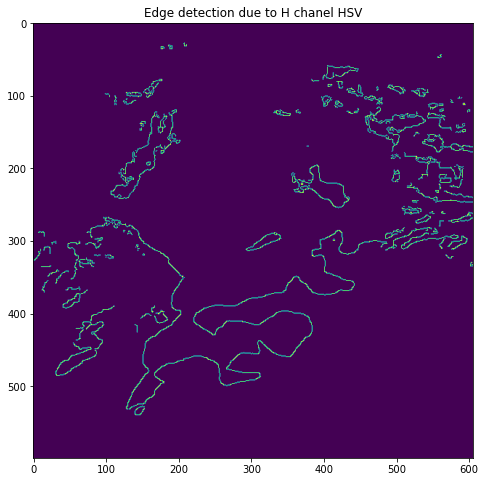

In [60]:
H_img = cv2.Canny(H,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(H_img)
plt.title('Edge detection due to H chanel HSV')
plt.show()

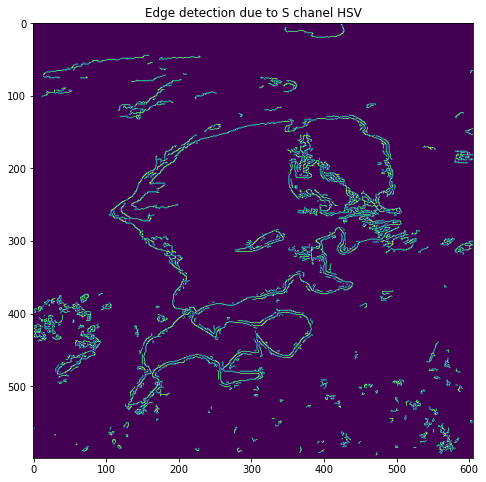

In [61]:
S_img = cv2.Canny(S,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(S_img)
plt.title('Edge detection due to S chanel HSV')
plt.show()

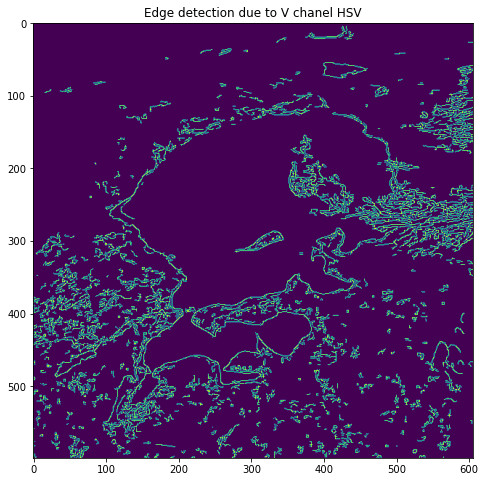

In [62]:
V_img = cv2.Canny(V,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(V_img)
plt.title('Edge detection due to V chanel HSV')
plt.show()

# Max fusion

In [70]:
def max_fusion(chanel_1,chanel_2,chanel_3):
    image = np.zeros(shape = chanel_1.shape)
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            image[row,column] = max(chanel_1[row,column],chanel_2[row,column],chanel_3[row,column])
    return image

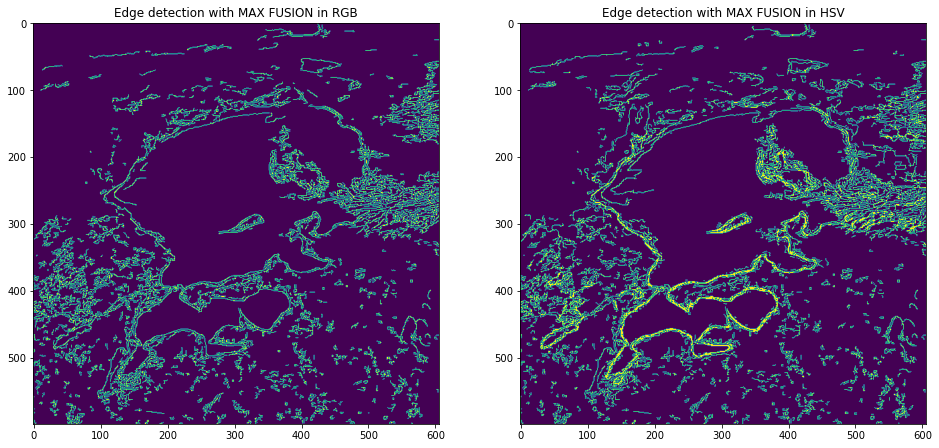

In [74]:
max_fusion_rgb = max_fusion(R_img,G_img,B_img)
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(max_fusion_rgb)
plt.title('Edge detection with MAX FUSION in RGB')


max_fusion_hsv = max_fusion(H_img,S_img,V_img)

plt.subplot(1,2,2)
plt.imshow(max_fusion_hsv)
plt.title('Edge detection with MAX FUSION in HSV')
plt.show()

# In gray scale

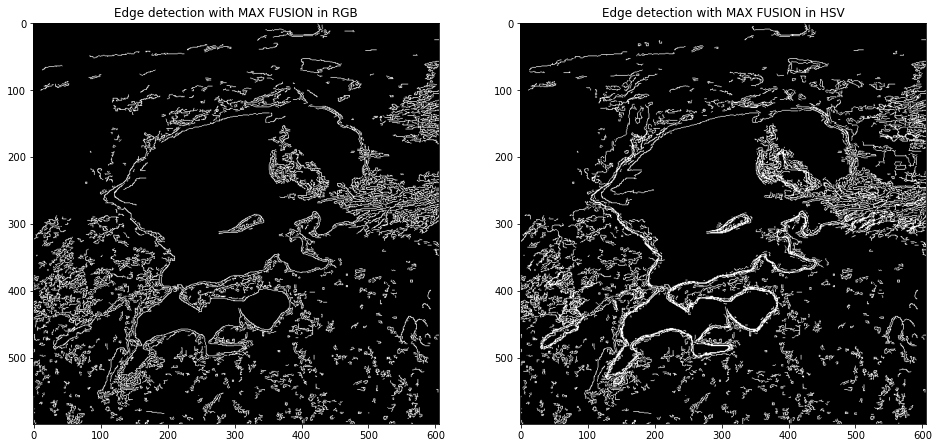

In [75]:
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(max_fusion_rgb,'gray')
plt.title('Edge detection with MAX FUSION in RGB')


max_fusion_hsv = max_fusion(H_img,S_img,V_img)

plt.subplot(1,2,2)
plt.imshow(max_fusion_hsv,'gray')
plt.title('Edge detection with MAX FUSION in HSV')
plt.show()

# As we can see in HSV edge detection we have a thick edges 

# PCA part

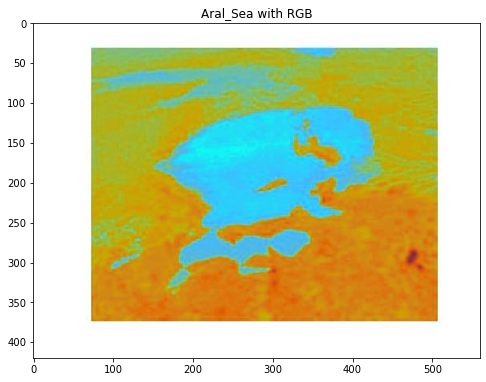

In [76]:
aral_PCA_axe1 = cv2.imread('Aral_PCA_axe1.jpg')
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(aral_PCA_axe1 )
plt.title('aral_PCA_axe1')
plt.show()

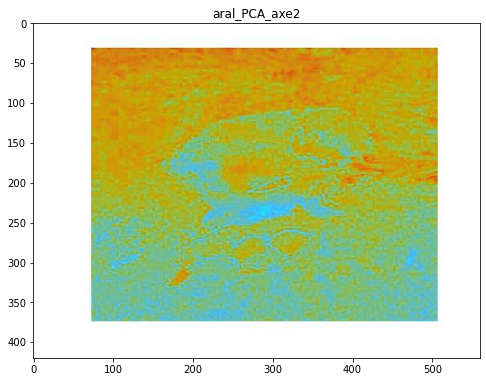

In [78]:
aral_PCA_axe2 = cv2.imread('Aral_pca_axe2.jpg')
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(aral_PCA_axe2)
plt.title('aral_PCA_axe2')
plt.show()

# Starting with RBG

In [79]:
(x,y,z) = aral_PCA_axe1.shape 

In [80]:
R = aral_PCA_axe1[:,:,0].reshape(x,y)
G = aral_PCA_axe1[:,:,1].reshape(x,y)
B = aral_PCA_axe1[:,:,2].reshape(x,y)

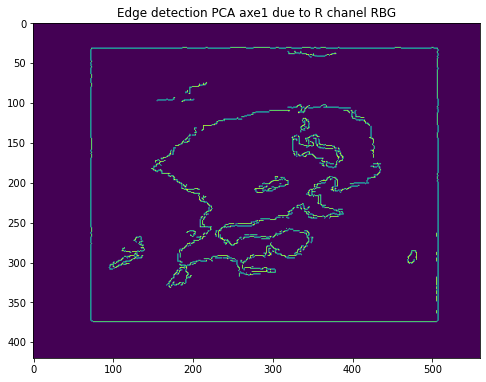

In [81]:
R_img_PCA = cv2.Canny(R,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(R_img_PCA)
plt.title('Edge detection PCA axe1 due to R chanel RBG')
plt.show()

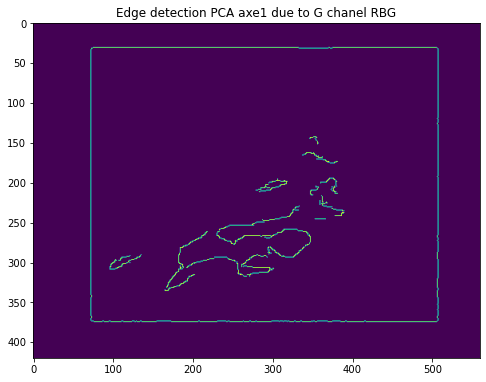

In [82]:
G_img_PCA = cv2.Canny(G,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(G_img_PCA)
plt.title('Edge detection PCA axe1 due to G chanel RBG')
plt.show()

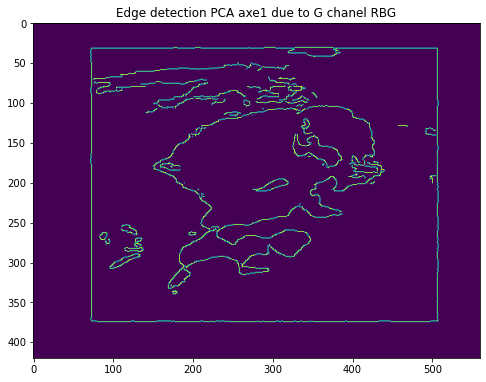

In [83]:
B_img_PCA = cv2.Canny(B,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(B_img_PCA)
plt.title('Edge detection PCA axe1 due to G chanel RBG')
plt.show()

Text(0.5, 1.0, 'Edge detection PCA axe1 with MAX FUSION in RGB')

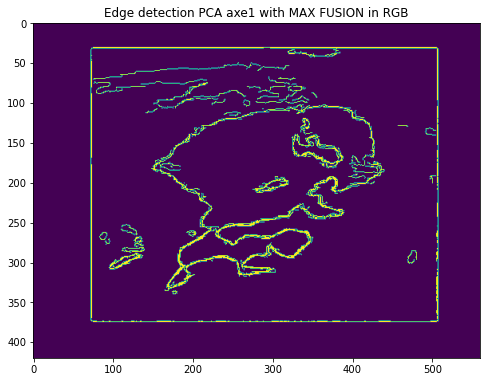

In [87]:
max_fusion_rgb_PCA = max_fusion(R_img_PCA,G_img_PCA,B_img_PCA
                               )
plt.subplots(1,1,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(max_fusion_rgb_PCA)
plt.title('Edge detection PCA axe1 with MAX FUSION in RGB')

# With HSV

In [88]:
(x,y,z) = aral_PCA_axe2.shape 

In [89]:
H = aral_PCA_axe2[:,:,0].reshape(x,y)
S = aral_PCA_axe2[:,:,1].reshape(x,y)
V = aral_PCA_axe2[:,:,2].reshape(x,y)

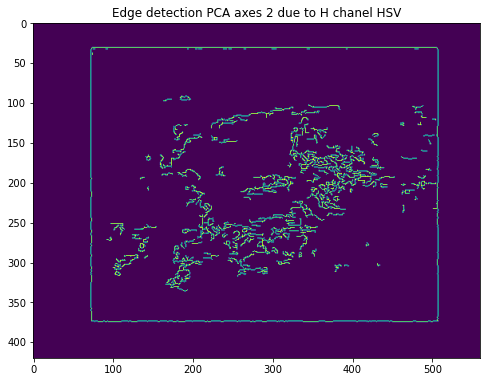

In [90]:
H_img_PCA2 = cv2.Canny(H,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(H_img_PCA2)
plt.title('Edge detection PCA axes 2 due to H chanel HSV')
plt.show()

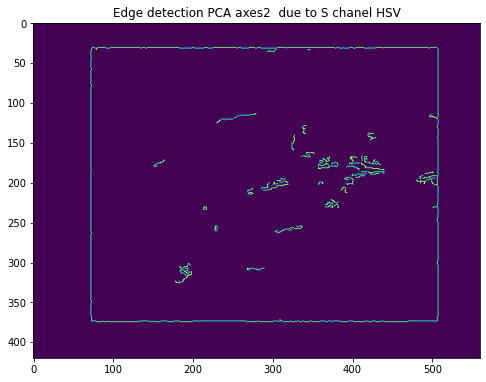

In [91]:
S_img_PCA2 = cv2.Canny(S,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(S_img_PCA2)
plt.title('Edge detection PCA axes2  due to S chanel HSV')
plt.show()

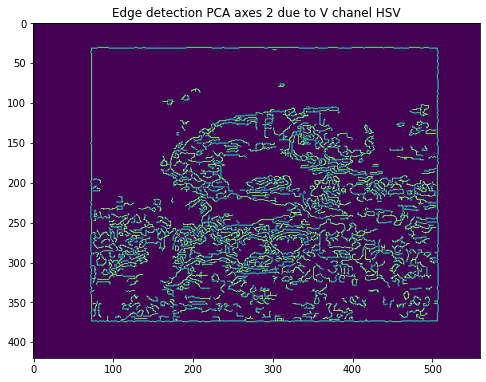

In [92]:
V_img_PCA2 = cv2.Canny(V,100,200)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(V_img_PCA2)
plt.title('Edge detection PCA axes 2 due to V chanel HSV')
plt.show()

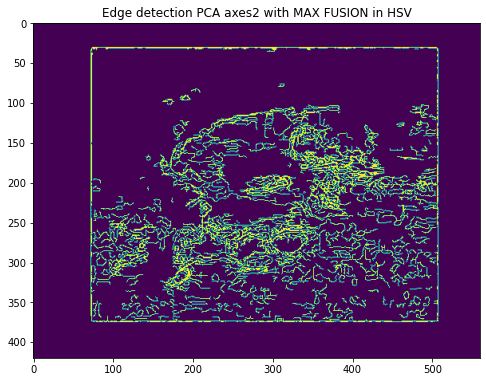

In [96]:
max_fusion_hsv_PCA2 = max_fusion(H_img_PCA2,S_img_PCA2,V_img_PCA2)

plt.subplots(1,1,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(max_fusion_hsv_PCA2)
plt.title('Edge detection PCA axes2 with MAX FUSION in HSV')
plt.show()

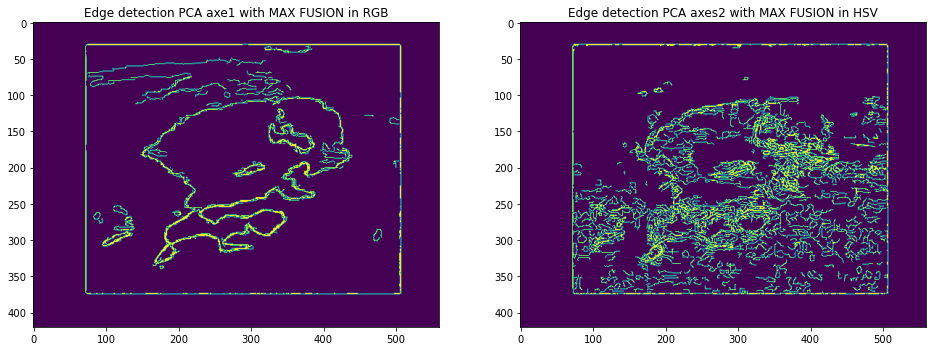

In [97]:
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(max_fusion_rgb_PCA)
plt.title('Edge detection PCA axe1 with MAX FUSION in RGB')


plt.subplot(1,2,2)
plt.imshow(max_fusion_hsv_PCA2)
plt.title('Edge detection PCA axes2 with MAX FUSION in HSV')
plt.show()